## Python With Binance Crypto Data:

Youtube reference Video by Nicholas Renotte: https://www.youtube.com/watch?v=4aqx5P2Y38U

Documentation Reference: https://python-binance.readthedocs.io/en/latest/



## Topics

* Binance API Setup
* Obtaining Data of BTCUSDT
* Preprocess Data
* mplfinance Candlestick Charts
* Creating A Function For Producing Candlestick Charts Given Trading Pair

## Binance API Setup

In [108]:
# pip install python-binance

In [109]:
# Binance API_info (not shown due to privacy)

api_key = 

secret_key = 

In [110]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

client = Client(api_key, secret_key)

In [111]:
# Obtain tickers:

tickers = client.get_all_tickers()

# First ten tickers
tickers[0:10]

[{'symbol': 'ETHBTC', 'price': '0.06240000'},
 {'symbol': 'LTCBTC', 'price': '0.00374400'},
 {'symbol': 'BNBBTC', 'price': '0.00912300'},
 {'symbol': 'NEOBTC', 'price': '0.00090000'},
 {'symbol': 'QTUMETH', 'price': '0.00277900'},
 {'symbol': 'EOSETH', 'price': '0.00175500'},
 {'symbol': 'SNTETH', 'price': '0.00003343'},
 {'symbol': 'BNTETH', 'price': '0.00142400'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00018060'}]

In [112]:
# Obtain tickers pairs with list comprehension:

ticker_pairs = [x['symbol'] for x in tickers]

In [113]:
ticker_pairs[0:10]

['ETHBTC',
 'LTCBTC',
 'BNBBTC',
 'NEOBTC',
 'QTUMETH',
 'EOSETH',
 'SNTETH',
 'BNTETH',
 'BCCBTC',
 'GASBTC']

In [114]:
# Obtain ticker pairs in USDT (Tether) as Tether is common in pairs for transactions:

usdt_pairs = [x['symbol'] for x in tickers if 'USDT' in x['symbol']]

In [115]:
usdt_pairs[0:10]

['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'BCCUSDT',
 'NEOUSDT',
 'LTCUSDT',
 'QTUMUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'EOSUSDT']

## Obtaining Histoical Data of BTCUSDT

In [116]:
# Crypto trading pair:

base_cur = 'BTC'
quote_cur = 'USDT'

user_pair = base_cur + quote_cur

In [117]:
# Obtain 1 minute timeframe data for BTCUSDT trading pair:
# Documentation: https://python-binance.readthedocs.io/en/latest/binance.html#binance.client.Client.get_historical_klines

klines = client.get_historical_klines(user_pair , Client.KLINE_INTERVAL_1DAY, "1 Dec, 2017", "July 22, 2021")

In [118]:
# Sample output
# It is a list of lists.
# Open time, Open, High, Low, Close, Volume, Close Time, Quote Asset Volume, Num Trades, Taker buy base asset vol,
# Taker buy quote asset vol, Ignore.

klines[0:3]


[[1512086400000,
  '9837.00000000',
  '10898.00000000',
  '9380.00000000',
  '10782.99000000',
  '6134.92363300',
  1512172799999,
  '62260697.58291551',
  32375,
  '3269.86858800',
  '33193672.16592109',
  '35258.70264511'],
 [1512172800000,
  '10775.04000000',
  '11190.00000000',
  '10620.00000000',
  '10890.01000000',
  '4765.43975700',
  1512259199999,
  '52046689.84006951',
  29694,
  '2390.19427500',
  '26111051.97904352',
  '35491.76836387'],
 [1512259200000,
  '10902.69000000',
  '11825.00000000',
  '10500.00000000',
  '11165.41000000',
  '5346.63652400',
  1512345599999,
  '60350708.29332783',
  39335,
  '2574.24618700',
  '29090180.16290429',
  '36967.53447487']]

In [119]:
# Convert klines historical data into Pandas dataframe:

btc_usdt_df = pd.DataFrame(klines)

In [120]:
btc_usdt_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1512086400000,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,1512172799999,62260697.58291551,32375,3269.86858800,33193672.16592109,35258.70264511
1,1512172800000,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,1512259199999,52046689.84006951,29694,2390.19427500,26111051.97904352,35491.76836387
2,1512259200000,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,1512345599999,60350708.29332783,39335,2574.24618700,29090180.16290429,36967.53447487
3,1512345600000,11165.41000000,11600.00000000,10802.00000000,11579.00000000,4663.42456200,1512431999999,52814985.63993067,32232,2516.85503100,28512751.47162289,38439.01284450
4,1512432000000,11571.03000000,11853.00000000,11447.68000000,11699.99000000,5550.73205500,1512518399999,64721253.04527842,31317,3135.63056500,36570499.65542363,41389.60555981


In [121]:
# Name colums:

col_names = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Num Trades', 
             'Taker buy base asset vol', 'Taker buy quote asset vol', 'Ignore']

In [122]:
btc_usdt_df.columns = col_names

In [123]:
btc_usdt_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Num Trades,Taker buy base asset vol,Taker buy quote asset vol,Ignore
0,1512086400000,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,1512172799999,62260697.58291551,32375,3269.86858800,33193672.16592109,35258.70264511
1,1512172800000,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,1512259199999,52046689.84006951,29694,2390.19427500,26111051.97904352,35491.76836387
2,1512259200000,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,1512345599999,60350708.29332783,39335,2574.24618700,29090180.16290429,36967.53447487
3,1512345600000,11165.41000000,11600.00000000,10802.00000000,11579.00000000,4663.42456200,1512431999999,52814985.63993067,32232,2516.85503100,28512751.47162289,38439.01284450
4,1512432000000,11571.03000000,11853.00000000,11447.68000000,11699.99000000,5550.73205500,1512518399999,64721253.04527842,31317,3135.63056500,36570499.65542363,41389.60555981


## Preprocess Data

In [124]:
# Check data types:

btc_usdt_df.dtypes

Open Time                     int64
Open                         object
High                         object
Low                          object
Close                        object
Volume                       object
Close Time                    int64
Quote Asset Volume           object
Num Trades                    int64
Taker buy base asset vol     object
Taker buy quote asset vol    object
Ignore                       object
dtype: object

Some columns need to be into numeric columns. Open time and Close time are in UNIX format and need to be converted into datetime.

In [125]:
# UNIX to datetime (divide by 1000):

btc_usdt_df['Open Time'] = pd.to_datetime(btc_usdt_df['Open Time']/1000, unit = 's')
btc_usdt_df['Close Time'] = pd.to_datetime(btc_usdt_df['Close Time']/1000, unit = 's')

In [127]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Num Trades', 
             'Taker buy base asset vol', 'Taker buy quote asset vol']

In [128]:
btc_usdt_df[numeric_cols] = btc_usdt_df[numeric_cols].apply(pd.to_numeric, axis = 1)

In [129]:
btc_usdt_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Num Trades,Taker buy base asset vol,Taker buy quote asset vol,Ignore
0,2017-12-01,9837.00,10898.0,9380.00,10782.99,6134.923633,2017-12-01 23:59:59.999000072,6.226070e+07,32375.0,3269.868588,3.319367e+07,35258.70264511
1,2017-12-02,10775.04,11190.0,10620.00,10890.01,4765.439757,2017-12-02 23:59:59.999000072,5.204669e+07,29694.0,2390.194275,2.611105e+07,35491.76836387
2,2017-12-03,10902.69,11825.0,10500.00,11165.41,5346.636524,2017-12-03 23:59:59.999000072,6.035071e+07,39335.0,2574.246187,2.909018e+07,36967.53447487
3,2017-12-04,11165.41,11600.0,10802.00,11579.00,4663.424562,2017-12-04 23:59:59.999000072,5.281499e+07,32232.0,2516.855031,2.851275e+07,38439.01284450
4,2017-12-05,11571.03,11853.0,11447.68,11699.99,5550.732055,2017-12-05 23:59:59.999000072,6.472125e+07,31317.0,3135.630565,3.657050e+07,41389.60555981


In [130]:
btc_usdt_df.dtypes

Open Time                    datetime64[ns]
Open                                float64
High                                float64
Low                                 float64
Close                               float64
Volume                              float64
Close Time                   datetime64[ns]
Quote Asset Volume                  float64
Num Trades                          float64
Taker buy base asset vol            float64
Taker buy quote asset vol           float64
Ignore                               object
dtype: object

## Candlestick Price Charts With Python's mplfinance

In [133]:
import mplfinance as mpf

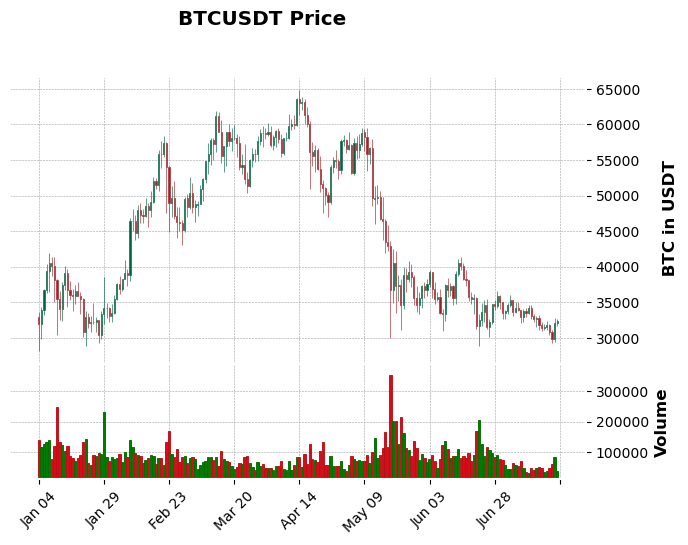

In [137]:
# Candlestick plot of BTCUSDT

mpf.plot(btc_usdt_df.set_index('Close Time').tail(200),
         type = 'candle', style = 'charles',
         volume = True,
         title = user_pair + " Price ",
         ylabel = '\n ' + base_cur + ' in ' + quote_cur


)

## Creating A Function For Producing Candlestick Charts Given Trading Pair

In [147]:
# Create a function that does the above steps:

def candlestick_prices_plot(start_date, end_date, base_cur, quote_cur, timeframe):
    trade_pair = base_cur + quote_cur
    
    if timeframe == '1day':
        data = client.get_historical_klines(trade_pair , Client.KLINE_INTERVAL_1DAY, start_date, end_date)
    elif timeframe == '1week':
        data = client.get_historical_klines(trade_pair , Client.KLINE_INTERVAL_1WEEK, start_date, end_date)
    elif timeframe == '1month':
        data = client.get_historical_klines(trade_pair , Client.KLINE_INTERVAL_1MONTH, start_date, end_date)
    else:
        print("Enter one of 1day, 1week or 1 month")
    
    # Into pandas dataframe:
    
    df = pd.DataFrame(data)
    col_names = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Num Trades', 
             'Taker buy base asset vol', 'Taker buy quote asset vol', 'Ignore']
    df.columns = col_names
    
    # Preprocess:
    # UNIX to datetime (divide by 1000):
    df['Open Time'] = pd.to_datetime(df['Open Time']/1000, unit = 's')
    df['Close Time'] = pd.to_datetime(df['Close Time']/1000, unit = 's')
    
    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Num Trades', 
             'Taker buy base asset vol', 'Taker buy quote asset vol']
    
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, axis = 1)
    
    # Candlestick plot of BTCUSDT

    mpf.plot(df.set_index('Close Time').tail(200),
         type = 'candle', style = 'charles',
         volume = True,
         title = trade_pair + " Price from \n" + start_date + ' to ' + end_date,
         ylabel = '\n ' + base_cur + ' in ' + quote_cur


)

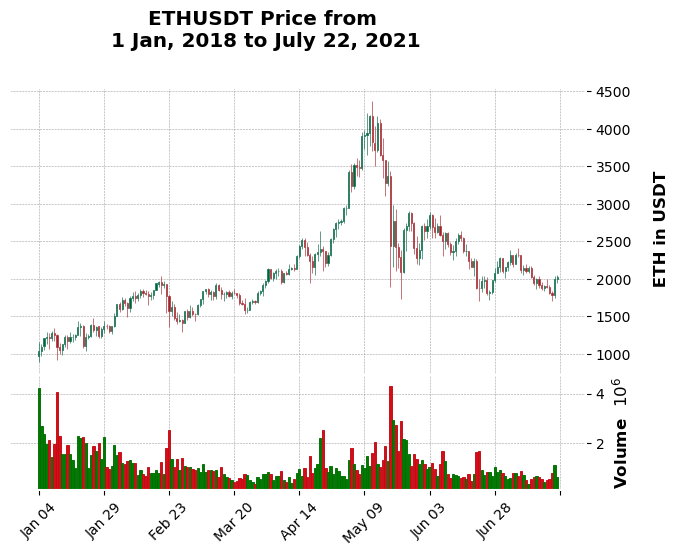

In [148]:
# Function Call 1:

candlestick_prices_plot(start_date = "1 Jan, 2018", end_date = "July 22, 2021", 
                        base_cur = 'ETH', quote_cur = 'USDT', timeframe = '1day')

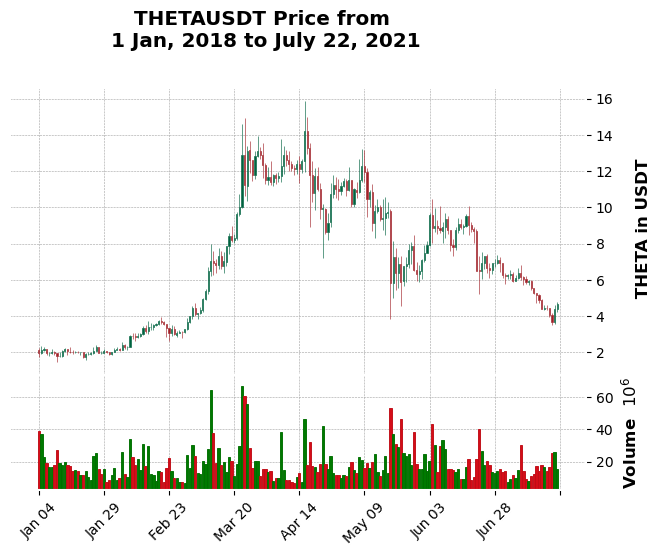

In [149]:
# Function Call 2 - THETA token in USDT price

candlestick_prices_plot(start_date = "1 Jan, 2018", end_date = "July 22, 2021", 
                        base_cur = 'THETA', quote_cur = 'USDT', timeframe = '1day')

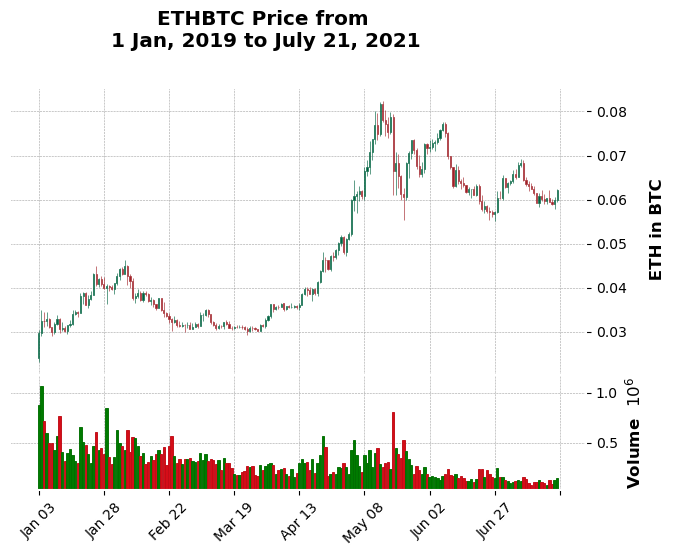

In [153]:
# Function Call 3 - ETH in BTC

candlestick_prices_plot(start_date = "1 Jan, 2019", end_date = "July 21, 2021", 
                        base_cur = 'ETH', quote_cur = 'BTC', timeframe = '1day')